<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Laptop Price Prediction:</font></h2>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:

# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [8]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Company,1303,19,Dell,297
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072
Weight,1303,179,2.2kg,121


In [9]:
missing_data = df.isnull().sum()

In [10]:
missing_data

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Hence no null value

In [11]:
df.shape

(1303, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [13]:
## remove gb and kg from Ram and weight and convert the cols to numeric
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

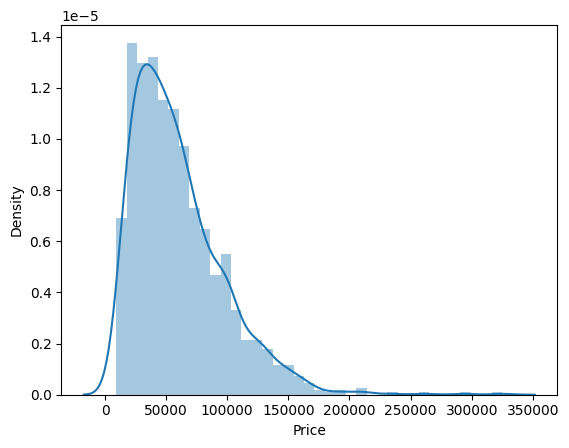

In [16]:
sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='count', ylabel='Company'>

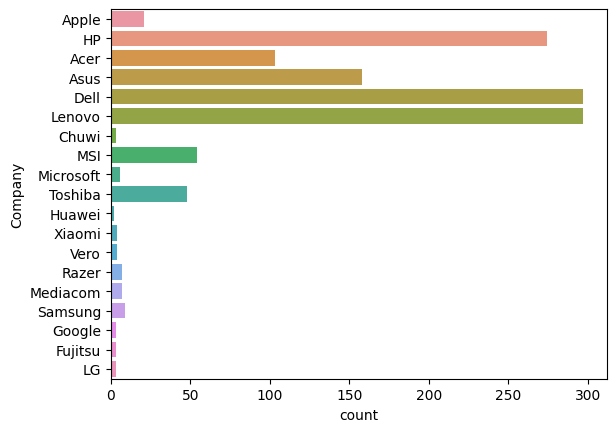

In [17]:
sns.countplot(y=df['Company'])

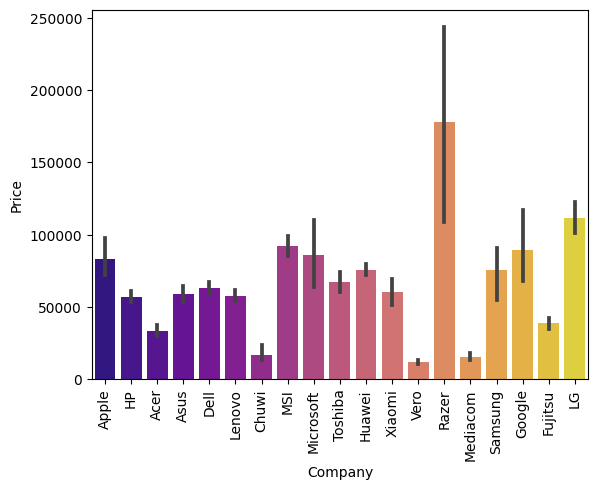

In [18]:
# avg price of each brand

sns.barplot(x=df['Company'], y=df['Price'],palette='plasma')

plt.xticks(rotation="vertical")

plt.show()

<Axes: xlabel='TypeName'>

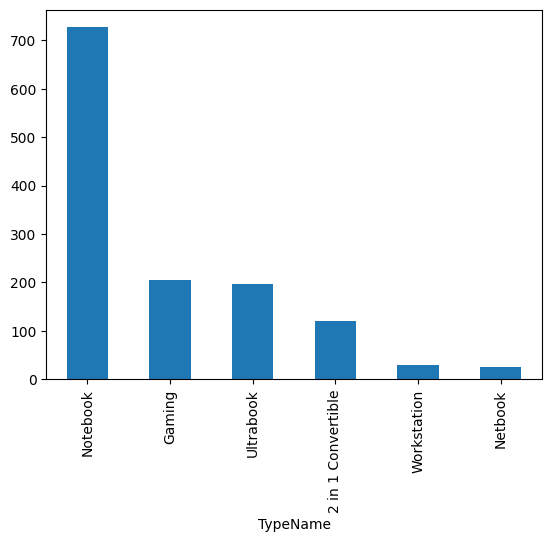

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

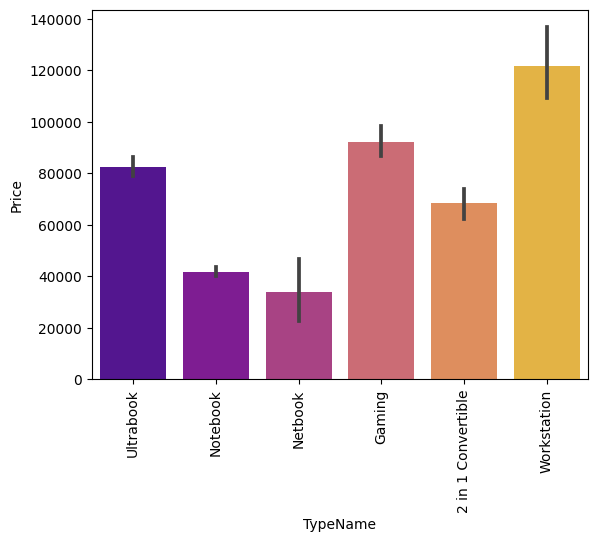

In [20]:
#type of laptop
sns.barplot(x=df['TypeName'], y=df['Price'],palette='plasma')
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Inches'>

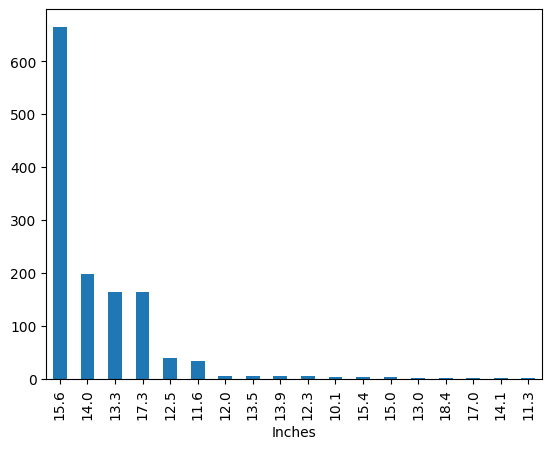

In [21]:
df['Inches'].value_counts().plot(kind='bar')

<Axes: xlabel='Inches', ylabel='Price'>

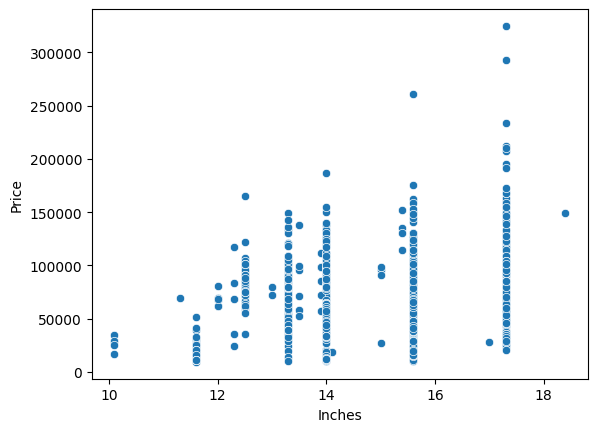

In [22]:
#price vary with laptop size in inches?
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [23]:
#Extract Touch screen information
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [24]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda element:'Yes' if 'Touchscreen' in element else 'No')
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
86,HP,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce GTX 940MX,Windows 10,1.83,37242.7200,No
454,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.36,52161.1200,No
355,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,51729.5520,No
1115,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1200,No
1251,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86,21258.7200,No
764,Dell,Notebook,13.3,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.65,45234.7200,No
889,Lenovo,Notebook,17.3,1600x900,AMD A4-Series 7210 2.2GHz,4,500GB HDD,AMD Radeon R3,Windows 10,2.80,20193.1200,No
1154,Dell,Notebook,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,Yes
874,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23,98514.7200,No
575,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,13266.7200,No


<Axes: xlabel='Touchscreen'>

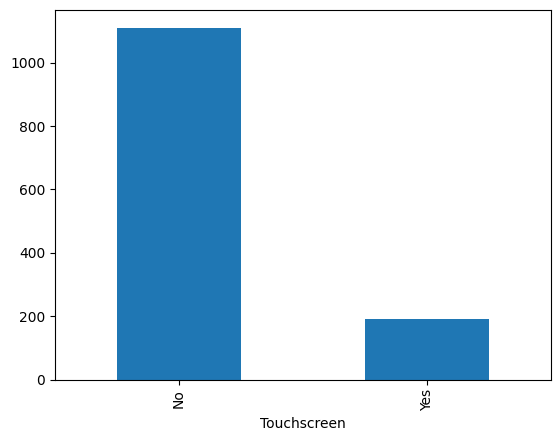

In [25]:
#Countplot for Touchscreen laptops
df['Touchscreen'].value_counts().plot(kind='bar')


<Axes: xlabel='Touchscreen', ylabel='Price'>

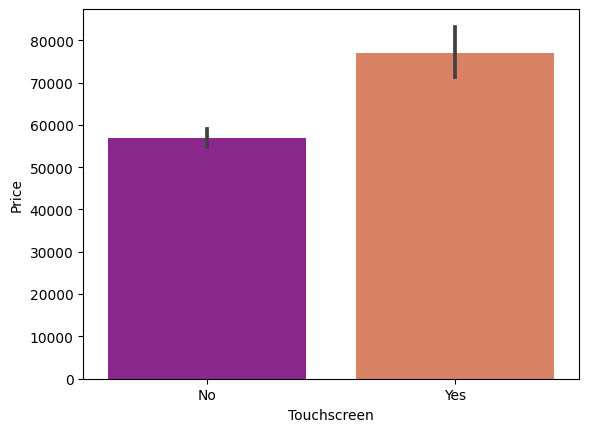

In [26]:
#Barplot - Price variation on Touch screen laptops
sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='plasma')

In [27]:
#Extract IPS Channel presence information
df['IPS'] = df['ScreenResolution'].apply(lambda element:'Yes' if "IPS" in element else 'No')
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
100,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon 530,Windows 10,1.91,38308.32,No,No
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.92,Yes,No
116,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.63,57755.52,No,No
377,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.60GHz,4,500GB HDD,Intel HD Graphics 400,Windows 10,1.80,16463.52,No,No
617,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.84,74005.92,No,No


<Axes: xlabel='IPS'>

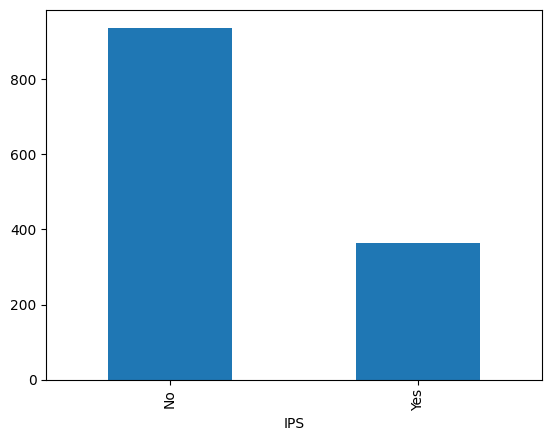

In [28]:
#Countplot for IPS laptops
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

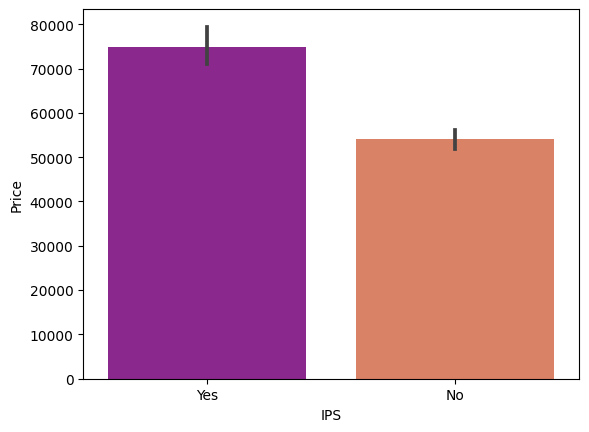

In [29]:
#Barplot - Price variation on IPS laptops
sns.barplot(x=df['IPS'],y=df['Price'],palette='plasma')

## Feature Engineering

In [30]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Yes,Yes
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Yes,Yes
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,No,No
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,No,No


In [31]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price     1.000000
Ram       0.743007
Weight    0.210370
Inches    0.068197
Name: Price, dtype: float64

In [32]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,Intel Core i5


<Axes: xlabel='Cpu_brand'>

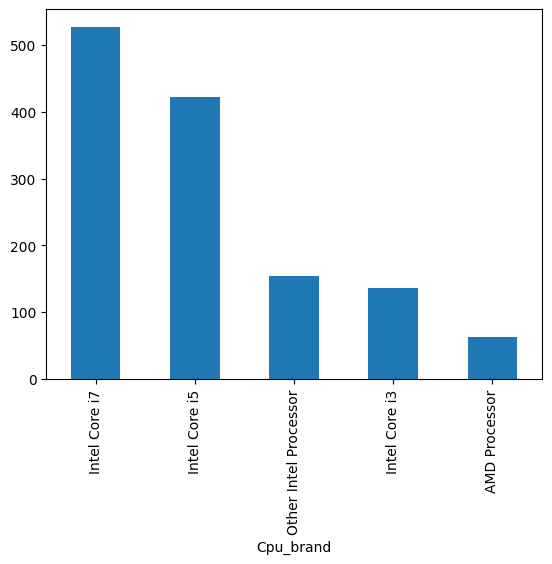

In [34]:
#Countplot for Cpu brand of laptops
df['Cpu_brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu_brand', ylabel='Price'>

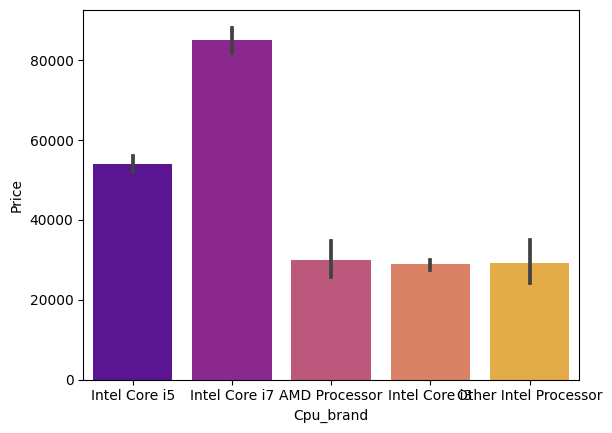

In [35]:
#Barplot - Price variation on Cpu brand of laptops
sns.barplot(x=df['Cpu_brand'],y=df['Price'],palette='plasma')

In [36]:
df.drop(['Cpu'],axis=1,inplace=True)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand
813,Dell,Notebook,15.6,Full HD 1920x1080,8,1TB HDD,Nvidia GeForce GT 940MX,Windows 10,1.98,51202.08,No,No,Intel Core i7
205,Lenovo,Gaming,15.6,Full HD 1920x1080,16,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.40,74485.44,No,No,Intel Core i7
774,HP,Ultrabook,12.5,1366x768,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280.32,No,No,Intel Core i5
702,Lenovo,Notebook,15.6,1366x768,8,1TB HDD,AMD Radeon R7,Windows 10,2.20,22857.12,No,No,AMD Processor
1053,HP,Notebook,15.6,1366x768,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,52161.12,No,No,Intel Core i5


<Axes: xlabel='Ram'>

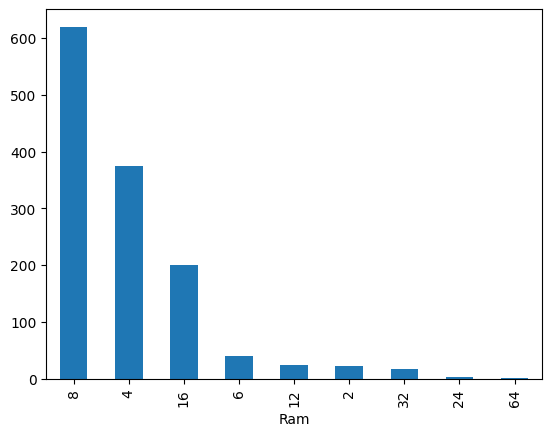

In [37]:
#Countplot for RAM of laptops
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

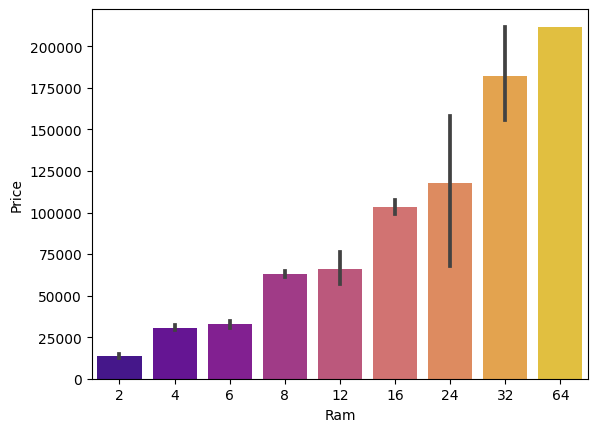

In [38]:
#Barplot - Price variation on RAM of laptops
sns.barplot(x=df['Ram'],y=df['Price'],palette='plasma')

In [39]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In here, we will do as follows,

*Four most common variants observed: HDD, SSD, Flash, Hybrid

*We will remove decimal space for example 1.0 TB will become 1TB

*We will replace the word GB with ""

*We will replace the word TB with "000"

*We will split the word across the "+" character

In [40]:
#preprocessing
df['Memory'] = df['Memory'].astype(str).replace('.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [41]:
df["Memory"].sample(10)

227                 256 SSD
808                 512 SSD
458                 256 SSD
1253                256 SSD
750                 128 SSD
994                 256 SSD
1047    256 SSD +  1000 HDD
549                 512 SSD
677        64 Flash Storage
1085                  0 HDD
Name: Memory, dtype: object

In [42]:
new = df["Memory"].str.split("+", expand = True)
new.sample(10)

,0,1
523,128 SSD,None
467,2000 HDD,None
1258,1000 Hybrid,None
1018,256 SSD,None
683,256 SSD,None
1300,64 Flash Storage,None
404,256 SSD,1000 HDD
925,0 HDD,None
202,1000 HDD,None
358,2000 HDD,None


In [43]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["first"].value_counts()

first
256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
0 HDD                132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
1 SSD                  5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
2 SSD                  1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
8 Hybrid               1
Name: count, dtype: int64

In [44]:
df["second"]= new[1]
df["second"].value_counts()

second
1000 HDD       185
2000 HDD        15
256 SSD          3
0 HDD            2
1000 Hybrid      2
512 SSD          1
Name: count, dtype: int64

In [45]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1HDD"].value_counts()

Layer1HDD
0    928
1    375
Name: count, dtype: int64

In [46]:
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1SSD"].value_counts()

Layer1SSD
1    843
0    460
Name: count, dtype: int64

In [47]:
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '',regex=True)
df["second"].fillna("0", inplace = True)
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302       0
Name: first, Length: 1303, dtype: object

In [48]:
#binary encoding
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [49]:
# Clean 'second' column to retain only digits
df['second'] = df['second'].str.replace(r'\D', '',regex=True)
df['second'].value_counts()

second
0       1097
1000     187
2000      15
256        3
512        1
Name: count, dtype: int64

In [50]:
# Convert 'first' column to integers directly
df["first"] = pd.to_numeric(df["first"]).astype(int)

# Convert 'second' column to integers
df["second"] = pd.to_numeric(df["second"]).astype(int)


In [51]:
#finalize the columns by keeping value
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [52]:
#Drop the un required columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


In [53]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
851,Asus,Gaming,15.6,Full HD 1920x1080,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.10,101178.7200,No,No,Intel Core i7,1000,128,0,0
1266,HP,Notebook,15.6,Full HD 1920x1080,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,No,No,AMD Processor,0,0,1000,0
151,Dell,Gaming,15.6,Full HD 1920x1080,8,1000 Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.7200,No,No,Intel Core i7,0,0,1000,0
190,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,16,1000 SSD,Intel HD Graphics 620,Windows 10,1.42,150462.7200,Yes,No,Intel Core i7,0,1000,0,0
417,HP,Ultrabook,14.0,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 520,Windows 10,1.43,79920.0000,No,No,Intel Core i7,0,256,0,0


In [54]:
df.drop(columns=['Memory'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,Intel Core i5,0,256,0,0


In [56]:

df.corr(numeric_only=True)['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
HDD             -0.026830
SSD              0.666734
Hybrid           0.008811
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [57]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,Intel Core i5,0,256


In [58]:
#Analysis on GPU
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [59]:
#Extracting the GPU brands
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


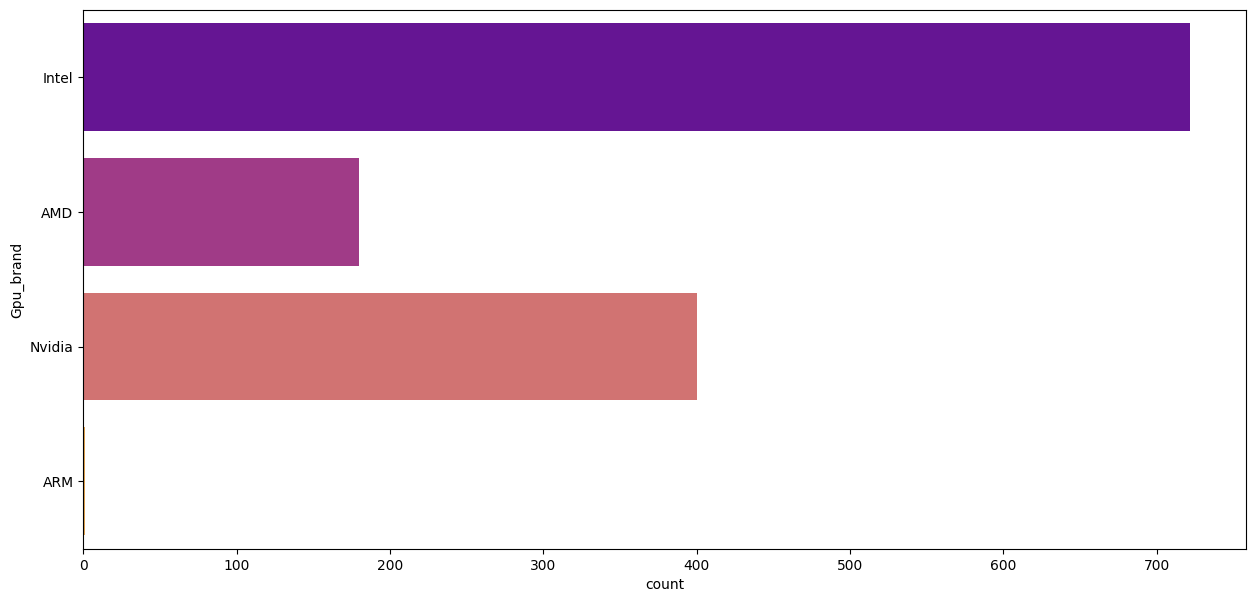

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [60]:
plt.figure(figsize=(15,7))
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(y=df['Gpu_brand'],palette='plasma')
plt.show()
df['Gpu_brand'].value_counts()

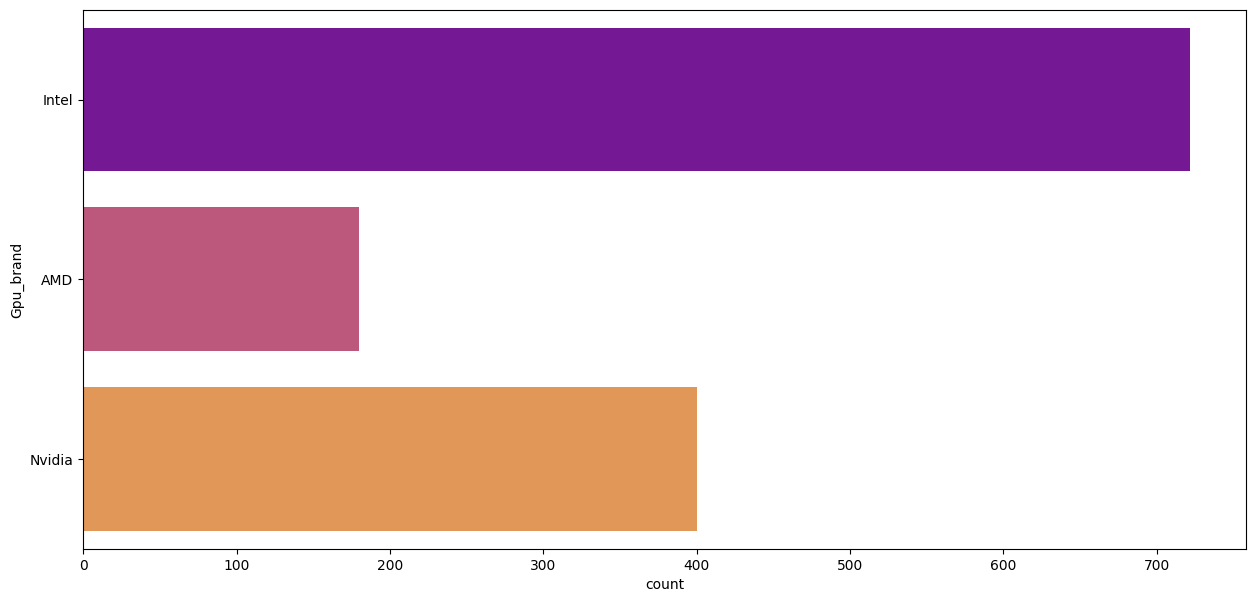

In [61]:
plt.figure(figsize=(15,7))
df = df[df['Gpu_brand']!='ARM']
sns.countplot(y=df['Gpu_brand'],palette='plasma')
plt.show()

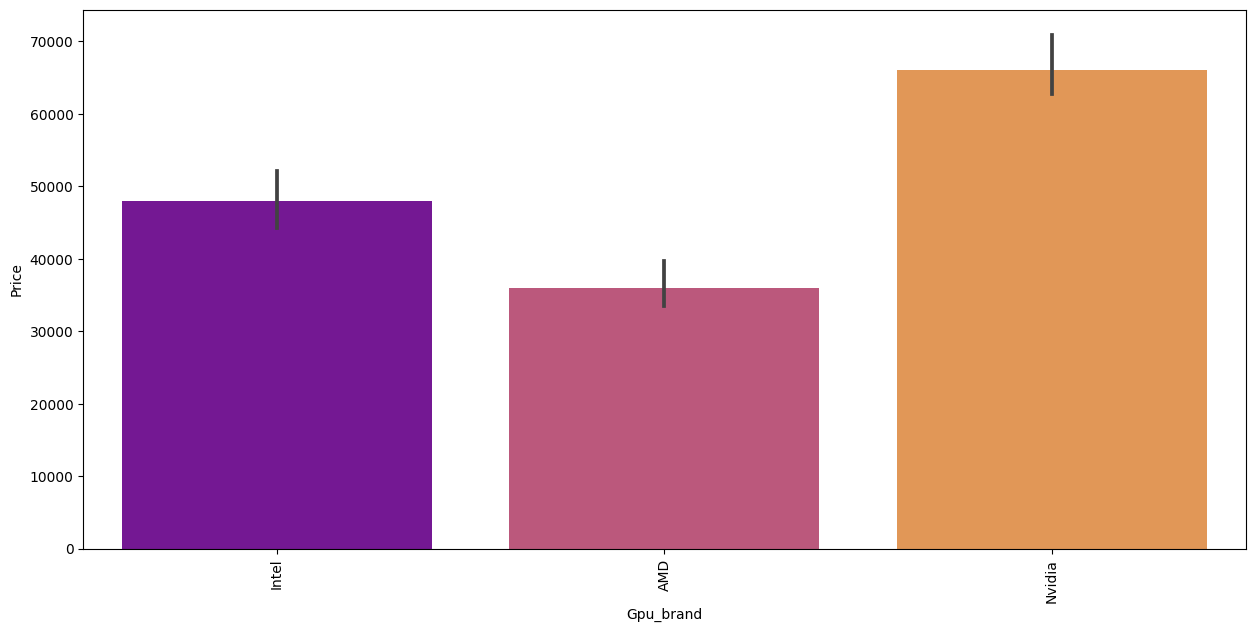

In [62]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator=np.median,palette='plasma')
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,No,Yes,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,No,Yes,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,No,Yes,Intel Core i5,0,256,Intel


In [64]:
#Operating System Column
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

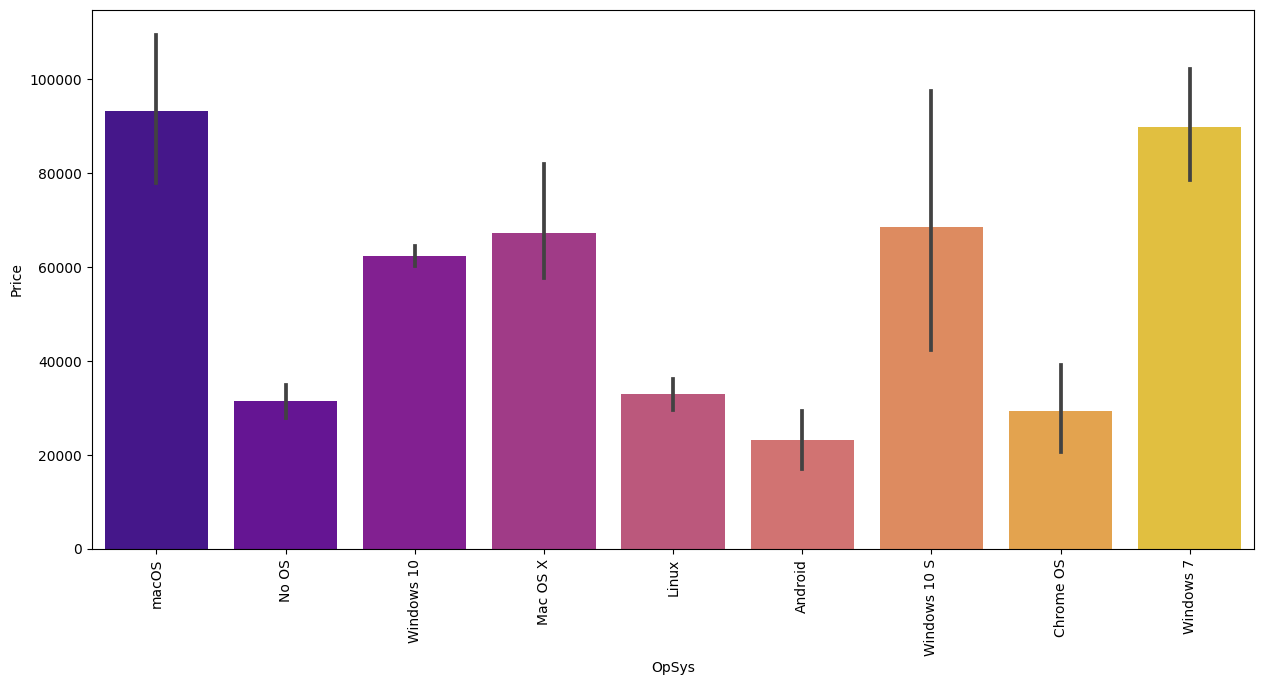

In [65]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['OpSys'],y=df['Price'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

In [66]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

We can see that there are many versions of one type of OS, espicially for Windows and macOS. So we can club them together like,

club {Windows 10,Windows 7,Windows 7 S}-->Windows

club {macOS,mac OS X}--> mac

others --> others

In [67]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os'] = df['OpSys'].apply(cat_os)
df.drop(columns=['OpSys'],inplace=True)

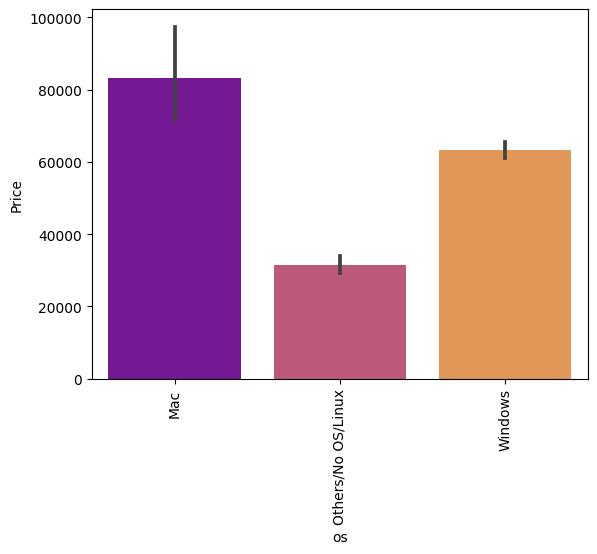

In [68]:
sns.barplot(x=df['os'],y=df['Price'],palette='plasma')
plt.xticks(rotation='vertical')
plt.show()

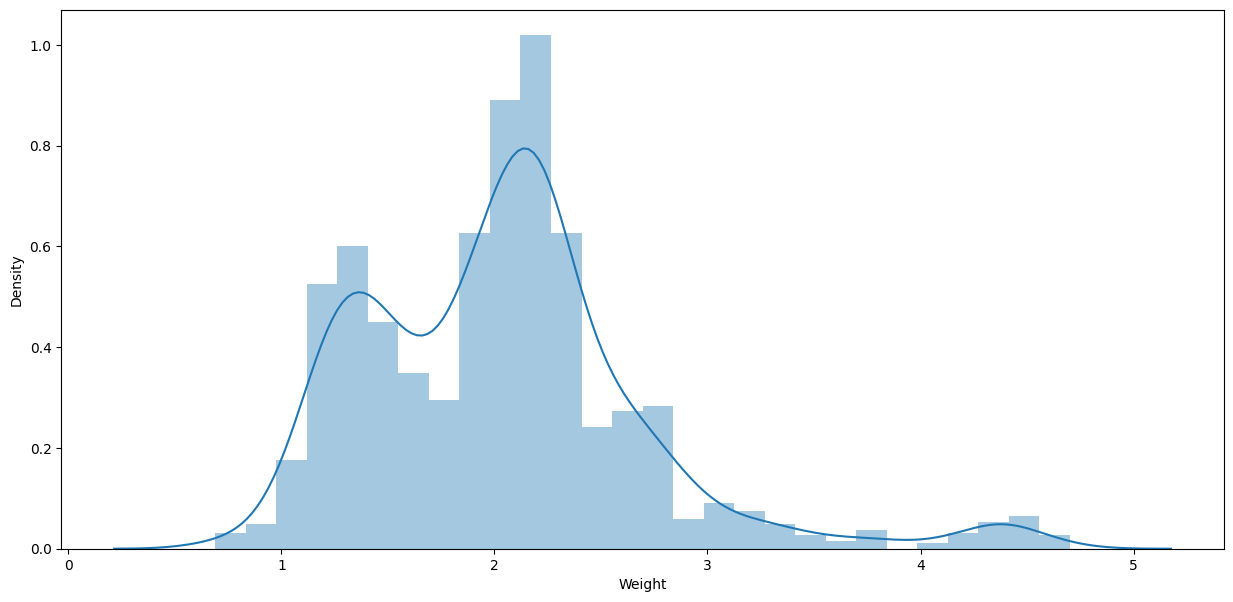

In [69]:
#Weight analysis
plt.figure(figsize=(15,7))
sns.distplot(df['Weight'])
plt.show()


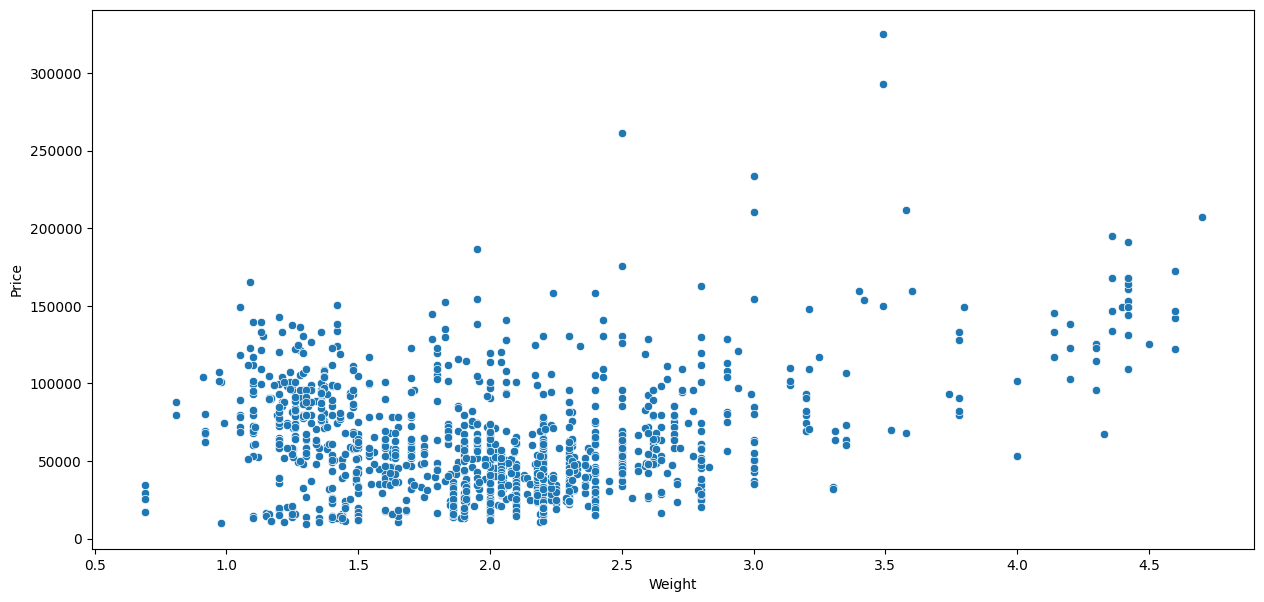

In [70]:
#Scatterplot - Price variation on weight
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()


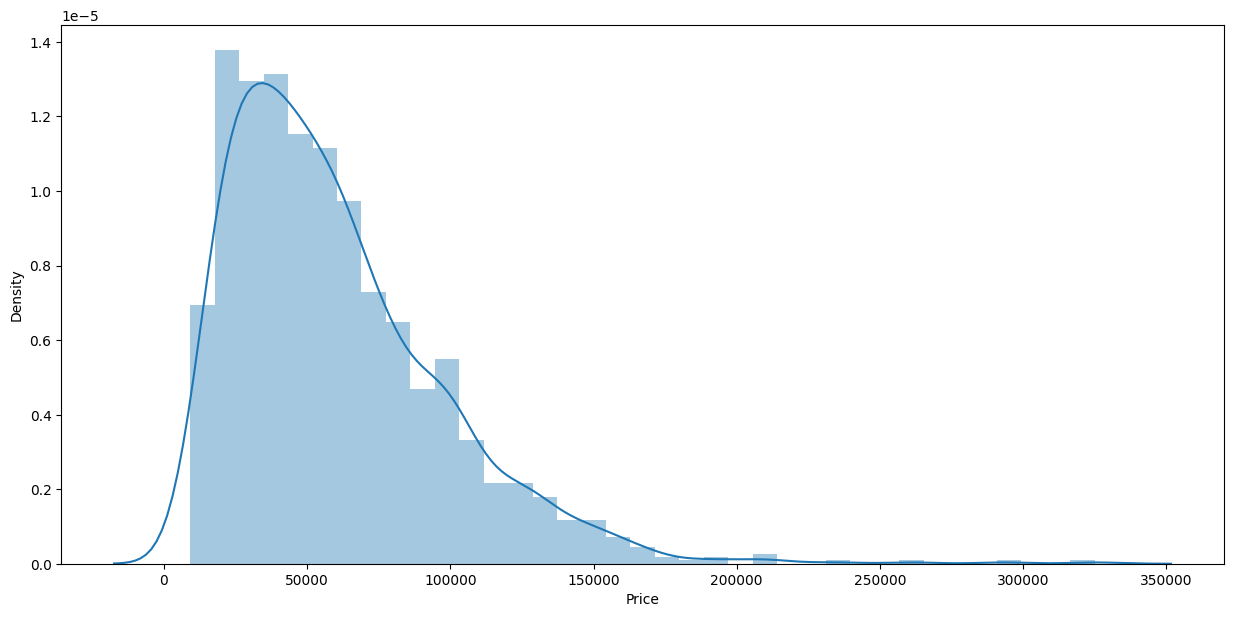

In [71]:
#Price analysis
plt.figure(figsize=(15,7))
sns.distplot(df['Price'])
plt.show()

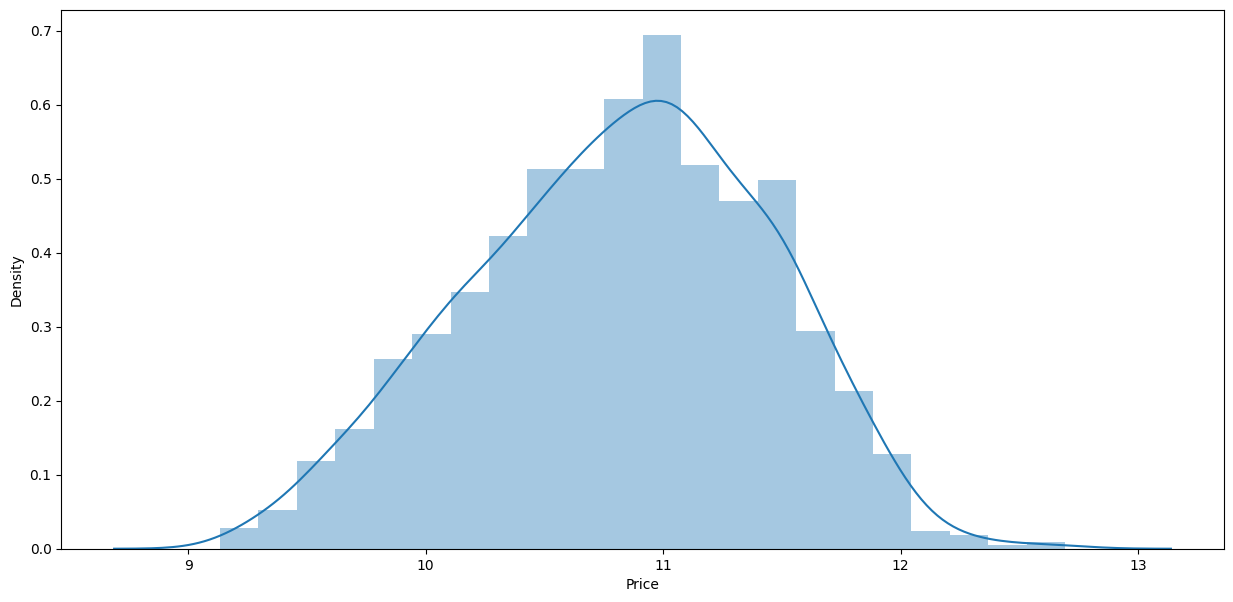

In [72]:
#apply np.log to get guassian distribution of price column
plt.figure(figsize=(15,7))
sns.distplot(np.log(df['Price']))
plt.show()

In [73]:
df.corr(numeric_only=True)['Price']

Inches    0.067329
Ram       0.742905
Weight    0.209867
Price     1.000000
HDD      -0.027189
SSD       0.666593
Name: Price, dtype: float64

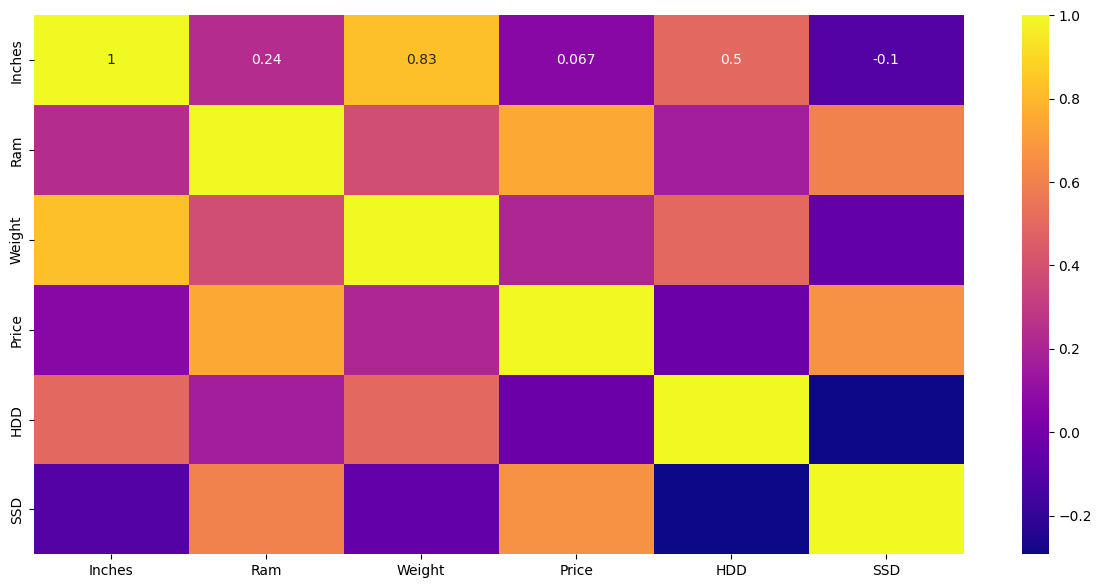

In [74]:
#Heatmap - Correlation for each features
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='plasma')
plt.show()

In [75]:
def ppi(df):
    splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
    df['X_res'] = splitdf[0]
    df['Y_res'] = splitdf[1]
    df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])
    df['X_res'] = df['X_res'].astype('int')
    df['Y_res'] = df['Y_res'].astype('int')
    df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/(df['Inches']+0.00000001)).astype('float')
    df.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)
ppi(df)

In [76]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu_brand,os,ppi
0,Apple,Ultrabook,8,1.37,71378.6832,No,Yes,Intel Core i5,0,128,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,47895.5232,No,No,Intel Core i5,0,0,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,30636.0000,No,No,Intel Core i5,0,256,Intel,Others/No OS/Linux,141.211998
3,Apple,Ultrabook,16,1.83,135195.3360,No,Yes,Intel Core i7,0,512,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,96095.8080,No,Yes,Intel Core i5,0,256,Intel,Mac,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,Yes,Yes,Intel Core i7,0,128,Intel,Windows,157.350512
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,Yes,Yes,Intel Core i7,0,512,Intel,Windows,276.053530
1300,Lenovo,Notebook,2,1.50,12201.1200,No,No,Other Intel Processor,0,0,Intel,Windows,111.935203
1301,HP,Notebook,6,2.19,40705.9200,No,No,Intel Core i7,1000,0,AMD,Windows,100.454670


## Model Building

In [77]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [78]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu_brand,os,ppi
0,Apple,Ultrabook,8,1.37,No,Yes,Intel Core i5,0,128,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,No,No,Intel Core i5,0,0,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,No,No,Intel Core i5,0,256,Intel,Others/No OS/Linux,141.211998
3,Apple,Ultrabook,16,1.83,No,Yes,Intel Core i7,0,512,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,No,Yes,Intel Core i5,0,256,Intel,Mac,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,Yes,Yes,Intel Core i7,0,128,Intel,Windows,157.350512
1299,Lenovo,2 in 1 Convertible,16,1.30,Yes,Yes,Intel Core i7,0,512,Intel,Windows,276.053530
1300,Lenovo,Notebook,2,1.50,No,No,Other Intel Processor,0,0,Intel,Windows,111.935203
1301,HP,Notebook,6,2.19,No,No,Intel Core i7,1000,0,AMD,Windows,100.454670


In [79]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [81]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu_brand,os,ppi
183,Toshiba,Notebook,8,2.00,No,No,Intel Core i5,0,128,Intel,Windows,100.454670
1141,MSI,Gaming,8,2.40,No,No,Intel Core i7,1000,128,Nvidia,Windows,141.211998
1049,Asus,Netbook,4,1.20,No,No,Other Intel Processor,0,0,Intel,Others/No OS/Linux,135.094211
1020,Dell,2 in 1 Convertible,4,2.08,Yes,Yes,Intel Core i3,1000,0,Intel,Windows,141.211998
878,Dell,Notebook,4,2.18,No,No,Intel Core i5,1000,128,Nvidia,Windows,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,No,No,Intel Core i3,0,0,Nvidia,Windows,100.454670
299,Asus,Ultrabook,16,1.63,No,No,Intel Core i7,0,512,Nvidia,Windows,141.211998
493,Acer,Notebook,8,2.20,No,No,AMD Processor,1000,0,AMD,Windows,100.454670
527,Lenovo,Notebook,8,2.20,No,No,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux,100.454670


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [83]:
step1 = ColumnTransformer(transformers=[
    ('lb_tnf',OrdinalEncoder(),['Touchscreen', 'IPS']),
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName','Cpu_brand','Gpu_brand',
       'os'])
],remainder='passthrough')

# Linear regression

In [84]:
step2 = LinearRegression(fit_intercept=False)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.801022031686908
MAE 0.21201335143271546


# Ridge Regression

In [85]:
step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8062995194195492
MAE 0.21101950512771336


# Lasso Regression

In [86]:
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8007793192541209
MAE 0.21283349276959748


# KNN

In [87]:
step2 = KNeighborsRegressor(n_neighbors=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8097824661161942
MAE 0.20566090140346502


# Decision Tree

In [88]:
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.83660247809498
MAE 0.184252834239309


# SVM

In [89]:
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8146850283124546
MAE 0.20509146420669763


# Random Forest

In [90]:
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8858148738620861
MAE 0.15623196287967459


# ExtraTrees

In [91]:
step2 = ExtraTreesRegressor(n_estimators=1000,
                              random_state=3,
                            bootstrap=True,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8822180951391274
MAE 0.15756549269906067


# AdaBoost

In [92]:
step2 = AdaBoostRegressor(n_estimators=17,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7916093868897554
MAE 0.22738267602778792


# Gradient Boost

In [93]:
step2 = GradientBoostingRegressor(n_estimators=1000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8766998270948109
MAE 0.15889976015665577


# XgBoost

In [94]:
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8800890444088412
MAE 0.1619878994873955


# Voting Regressor

In [99]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

rf =  RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=1000)
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
et = ExtraTreesRegressor(n_estimators=1000,
                              random_state=3,
                            bootstrap=True,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)
estimators=[('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)]
step2 = VotingRegressor(estimators=estimators,weights=[1,1,5,4])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8929517030606153
MAE 0.1521524876196368


In [96]:
step2 = StackingRegressor(estimators=estimators, final_estimator=ExtraTreesRegressor(n_estimators=1000,random_state=3,bootstrap=True,max_samples=0.8,max_features=0.75,max_depth=15))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8844406405464337
MAE 0.1542361571089348


In [100]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('lb_tnf', OrdinalEncoder(),
                                                  ['Touchscreen', 'IPS']),
                                                 ('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'os'])])),
                ('step2',
                 VotingRegressor(estimators=[('rf',
                                              RandomForestRegressor(max_depth=15,
                                                                    max_features=0.75,
                                                                    max_samp...
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=5,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=45,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...)),
                                             ('et',
                                              ExtraTreesRegressor(bootstrap=True,
                                                                  max_depth=15,
                                                                  max_features=0.75,
                                                                  max_samples=0.8,
                                                                  n_estimators=1000,
                                                                  random_state=3))],
                                 weights=[1, 1, 5, 4]))])

In [101]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))